# <font color='red'> LESSON 3C: Classification model </font>
  * <span style="color:blue"> **Label binarization**</span>
    * to enable 2 models one with numerical label and the other with binary label
  * <span style="color:blue">**Classification model**</span>
    * feature selection - chi-square test for categorical variables
    * model preparation (more techniques) 
    * model interpretation (shortly)

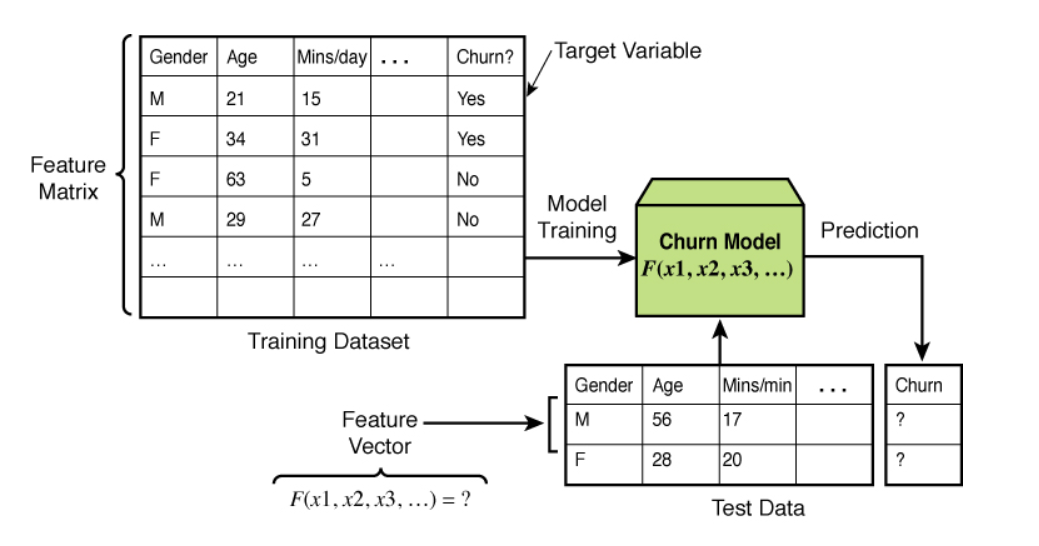

In [2]:
from PIL import Image, ImageOps
Image.open('images/klasifikace.png')

## Classification tasks
GOAL: To predict the outcome of a given sample where the output variable is in the form of categories. 
Examples labels such as: male & female, sick & healthy, churner & non-churner, default & correct.

This means that we can use the following algorithms:

* Logistic regression
* Decision tree
* Random forest
* Support Vector Classifications
* Stocastic Gradient Descend
* Nearest Neighbours Classifiers
* Gaussian Process Classification
* Other ensemble
* Neural Network Models
* Gradient Boosting (XGBoost)

We will start on those that we are more familiar with: Logistic regression. First, let's start with label. 

### Our dataset after datamart fine-tuning

In [3]:
import pandas as pd
data = pd.read_parquet('./data/full_data.parquet')
data

,MSSubClass_120,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_OTHER,MSZoning_OTHER,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,...,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,label
1,0,0,0,1,0,0,1,0,0,1,...,0.532289,0.289638,-0.796041,-0.502349,-0.051541,1.768105,-0.811747,-0.359325,-0.270208,208500
2,0,1,0,0,0,0,1,0,0,1,...,-0.327437,-0.653917,1.191828,0.586571,0.663315,-0.787243,-0.011497,-0.359325,-0.270208,181500
3,0,0,0,1,0,0,1,0,0,1,...,-0.739702,-0.540801,0.939328,0.443182,0.827539,-0.787243,-0.144872,4.092524,-0.270208,223500
4,0,0,0,0,1,0,1,0,0,1,...,0.238172,-0.033157,1.621080,1.442744,1.764579,0.859156,0.788753,-0.359325,-0.270208,140000
5,0,0,0,1,0,0,1,0,0,1,...,-0.639150,-0.996025,0.503190,-0.294540,0.045061,-0.444243,-0.240140,-0.359325,-0.270208,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,1,0,0,0,1,0,0,0,1,...,-0.244481,-0.562873,0.797009,0.297716,-0.051541,-0.787243,-0.049605,-0.359325,-0.270208,185000
1456,0,0,0,1,0,0,1,0,0,1,...,1.236157,2.527134,-0.796041,1.182983,0.141664,2.205430,-0.811747,-0.359325,-0.270208,175000
1457,0,1,0,0,0,0,1,0,0,1,...,0.255769,0.085477,1.848330,1.737833,-1.056203,-0.787243,0.331467,-0.359325,-0.270208,210000
1458,0,0,0,0,1,0,1,0,0,1,...,0.069746,-0.218006,-0.796041,-0.884718,-1.114164,2.351205,-0.811747,1.473789,-0.270208,266500


## Label Binarization 
To obtain a binary variable that we can use as the response variable in a logistic regression, we have to create a new target variable **Label_b** for expensive saleprice (1) and other saleprices (0). 
For convenience we devide expensive and other prices based on the value of sales. The top 10% of highest prices are expensive, it stands for the threshold is quantil 0.90.

In [4]:
import numpy as np

In [5]:
data['label_b'] = data['label'] >= np.quantile(data['label'], 0.9)

In [6]:
data[data['label_b'] == False]

,MSSubClass_120,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_OTHER,MSZoning_OTHER,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,...,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,label,label_b
1,0,0,0,1,0,0,1,0,0,1,...,0.289638,-0.796041,-0.502349,-0.051541,1.768105,-0.811747,-0.359325,-0.270208,208500,False
2,0,1,0,0,0,0,1,0,0,1,...,-0.653917,1.191828,0.586571,0.663315,-0.787243,-0.011497,-0.359325,-0.270208,181500,False
3,0,0,0,1,0,0,1,0,0,1,...,-0.540801,0.939328,0.443182,0.827539,-0.787243,-0.144872,4.092524,-0.270208,223500,False
4,0,0,0,0,1,0,1,0,0,1,...,-0.033157,1.621080,1.442744,1.764579,0.859156,0.788753,-0.359325,-0.270208,140000,False
5,0,0,0,1,0,0,1,0,0,1,...,-0.996025,0.503190,-0.294540,0.045061,-0.444243,-0.240140,-0.359325,-0.270208,250000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,1,0,0,0,1,0,0,0,1,...,-0.562873,0.797009,0.297716,-0.051541,-0.787243,-0.049605,-0.359325,-0.270208,185000,False
1456,0,0,0,1,0,0,1,0,0,1,...,2.527134,-0.796041,1.182983,0.141664,2.205430,-0.811747,-0.359325,-0.270208,175000,False
1457,0,1,0,0,0,0,1,0,0,1,...,0.085477,1.848330,1.737833,-1.056203,-0.787243,0.331467,-0.359325,-0.270208,210000,False
1458,0,0,0,0,1,0,1,0,0,1,...,-0.218006,-0.796041,-0.884718,-1.114164,2.351205,-0.811747,1.473789,-0.270208,266500,False


Let's check whether new labal is really binary (class) variable. 

In [7]:
display(data['label_b'].nunique())
data.label_b.unique()

2

array([False,  True])

In [8]:
display(data['label_b'].value_counts())

False    1312
True      147
Name: label_b, dtype: int64

## Chi-Square Statistic
In simple terms, the chi -square statistic measures the difference between what you expect to happen and what actually happens. 
The formula reads:

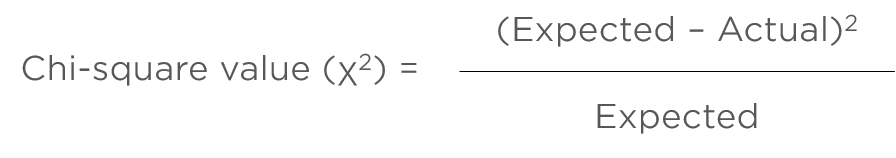

In [9]:
Image.open('images/Chi-square.png')

If the chi-square value is large, then the p-value associated with the chi-square is small. 
The p -value represents the probability that the event occurred by chance. The chi -square statistic is the underlying test for
many modeling procedures including logistic regression and certain classification trees.

In [10]:
display(data['HasGarage_True'].value_counts())

1    1378
0      81
Name: HasGarage_True, dtype: int64

### Contingency table
To run the Chi-Square Test, the easiest way is to convert the data into a contingency table with frequencies. 
We will use the crosstab command from pandas. 
In this example, the contingency table is 2×2. 

In [11]:
from scipy.stats import chi2_contingency
from scipy.stats import norm
import math

# Pivoting the dataframe and assigning label_b as the index,
# Status as the column headings, and percentage of respondents as the values
#pivot_df = data.pivot(index='label_b', columns='HasGarage_True', values='Percentage') 
contigency= pd.crosstab(data['label_b'], data['HasGarage_True'])
contigency

HasGarage_True,0,1
label_b,,
False,81,1231
True,0,147


### Hypothesis
Assume that we want to test if there is a statistically significant difference in PriceType which is Label_B (True=ExclusivePrice, False=OtherPrice) and between Houses with and without Garage Accessory.
The null hypothesis is that PriceType and Garage Accessory are independent. 
An alternate hypothesis would state that there is a significant relation between the PriceType and HasGarage_True.

### Chi-square assumptions
* The two variables are categorical (nominal) and data is randomly sampled
* The levels of variables are mutually exclusive
* The expected frequency count for at least 80% of the cell in a contingency table is at least 5
* The expected frequency count should not be less than 1
* Observations should be independent of each other
* Observation data should be frequency counts and not percentages, proportions or transformed data

### Chi-Square Test
Now that we have built the contingency table we can pass it to chi2_contingency function from the scipy package which returns the:

* chi2: The test statistic
* p: The p-value of the test
* dof: Degrees of freedom
* expected: The expected frequencies, based on the marginal sums of the table

In [12]:
# Chi2 test 
chi2, p, dof, ex = chi2_contingency(contigency)
print(chi2, '{:.10f}'.format(p))

8.467578718483495 0.0036153235


### Test evaluation
If the chi-square value is large than the p-value associated with the chi-square is small. 
The p-value is 0.36% which means that we reject the null hypothesis at 95% level of confidence. 
<span style="color:blue"> **Exclusive Price and Garage Accessory are dependent!!!** </span>
The variable HasGarage_True can be useful predictor in model. 

Notice that the Chi-Square test can be extended to m x n contingency tables.


In [13]:
contigency_2= pd.crosstab(data['label_b'], data['Foundation_PConc'])
contigency_2

Foundation_PConc,0,1
label_b,,
False,794,518
True,18,129


In [14]:
# Chi2 test 
chi2, p, dof, ex = chi2_contingency(contigency_2)
print(chi2, '{:.10f}'.format(p))

122.86528928738349 0.0000000000


### Feature selection based on Chi-square
Compute chi-squared stats between each non-negative feature and class.

This score can be used to select the N features with the highest values for the test chi-squared statistic from feature list, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes. 

#### Selection of categorical features  


In [15]:
unique_count_ratio = 0.05
empty_ratio = 0.9
min_distinct_values = 2
excluded_features = ['label_b']
cat_features = []
columns = data.columns 
#consider feature categorical if ratio is below given value and number of unique records is >= 2
for var in columns:
    if \
      1.*data[var].nunique()/data[var].count() < unique_count_ratio \
      and data[var].nunique() >= min_distinct_values \
      and data[var].isna().sum() / data[var].count() < empty_ratio:
        cat_features.append(var)
cat_features = [f for f in cat_features if f not in excluded_features ]
display(cat_features)

['MSSubClass_120',
 'MSSubClass_20',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_OTHER',
 'MSZoning_OTHER',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_OTHER',
 'LotShape_Reg',
 'LandContour_Lvl',
 'LandContour_OTHER',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_Inside',
 'LotConfig_OTHER',
 'LandSlope_Gtl',
 'LandSlope_OTHER',
 'Neighborhood_CollgCr',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_NAmes',
 'Neighborhood_NridgHt',
 'Neighborhood_OTHER',
 'Neighborhood_OldTown',
 'Neighborhood_Sawyer',
 'Neighborhood_Somerst',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_OTHER',
 'Condition2_Norm',
 'Condition2_OTHER',
 'BldgType_1Fam',
 'BldgType_OTHER',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Fin',
 'HouseStyle_1Story',
 'HouseStyle_2Story',
 'HouseStyle_OTHER',
 'OverallQual_4',
 'OverallQual_5',
 'OverallQual_6',
 'OverallQual_7',
 'OverallQual_8',
 'Overa

#### Chi-square computation

In [16]:
from sklearn.feature_selection import chi2
#cat_features_only = data.drop(['label', 'label_b'], axis=1)
chi = chi2(data[cat_features], data.label_b)
chi_table = pd.DataFrame()
chi_table['chi_sq_value'] = chi[0]
chi_table['p_value'] = chi[1]
chi_table['feature'] = cat_features

pd.set_option('display.max_rows', None)
display(chi_table.set_index('feature').sort_values('p_value', ascending=True))
pd.set_option('display.max_rows', 10)

,chi_sq_value,p_value
feature,,
GarageCars_3,491.338448,7.287555e-109
BsmtQual_Ex,431.878588,6.338925e-96
KitchenQual_Ex,309.153864,3.338493e-69
OverallQual_OTHER,275.538517,7.044627e-62
Neighborhood_NridgHt,232.127529,2.048203e-52
ExterQual_OTHER,197.321781,8.022292e-45
OverallQual_8,192.095190,1.109198e-43
MasVnrType_Stone,125.192722,4.618426e-29
SaleType_New,121.904990,2.421613e-28


## Introduction into Discrete Regression
Regression with discrete dependent variables (e.g., binary outcomes) requires different techniques than the linear regression model that we have seen so far. 

The reason is that linear regression requires that the response variable is a normally distributed continuous variable, which cannot be used directly for a response variable that has only a few discrete possible outcomes, such as binary variables or variables taking positive integer values!!! 

However, using a suitable transformation, it is possible to map a linear predictor to an interval that can be interpreted as a probability of different discrete outcomes. 
For example, in the case of binary outcomes, one popular transformation is the logistic function:

log(p/(1 − p)) = β0 + β ∙ x, 

or p = (1 + exp (−β0 − β1 ∙ x))−1, which maps x ∈ [−∞, ∞] to p ∈ [0, 1]. 

This procedure, which is known as logistic regression, is an example of a binary classifier. 

E.g. the statsmodels library provides several methods for discrete regression:
* the **Logit** class,
* the related **Probit** class (which uses a cumulative distribution function of the normal distribution rather than the logistic  function to transform the linear predictor to the [0, 1] interval), 
* the multinomial logistic regression class **MNLogit** (for more than two categories), and 
* the Poisson regression class **Poisson** for Poisson-distributed count variables (positive integers).

Here we will create a logistic model for predicting the type of saleprice from our features. 

## Logistic regression

Binary model is a type of model which solves a classification problem!!!

logistic regression is a powerful and robust statistical technique for predicting the probability of an event occurring. 

Robust technique means that the model will perform well and hold up over time. 
Because the predictors are linear in the log of the odds, the trick is to get the predictors as linear as possible. 
There are several ways to accomplish this. 

Logistic regression sees all predictive variables as continuous. So for the noncontinuous variables, we have to use dummy variables to trick the model into thinking they are continuous.


### Splitting dataset into train and test
Let's split our dataset into train and test, it is important these two do not communicate during the training.
This means we will train on 70% of the data and test on the remaining 30.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[cat_features], data.label_b, test_size=0.30, random_state=42) 
print('\nFrequencies of target variable in training data set:\n',y_train.value_counts())
print('\nFrequencies of target variable in testing data set:\n',y_test.value_counts())


Frequencies of target variable in training data set:
 False    920
True     101
Name: label_b, dtype: int64

Frequencies of target variable in testing data set:
 False    392
True      46
Name: label_b, dtype: int64


### LogisticRegression

#### Sklearn library

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred=log_model.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for Logistic regression model: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.97      0.97      0.97       392
        True       0.76      0.76      0.76        46

    accuracy                           0.95       438
   macro avg       0.87      0.87      0.87       438
weighted avg       0.95      0.95      0.95       438

[[381  11]
 [ 11  35]]

Accuracy Score for Logistic regression model:  0.9497716894977168


#### Statsmodels library
We can now see how to solve the same example using the statsmodels library, specifically the logit package, that is for logistic regression. The package contains an optimised and efficient algorithm to find the correct regression parameters.


In [19]:
import statsmodels.api as sm

log_model2 = sm.Logit(y_train.astype(int), X_train[['GarageCars_3', 'BsmtQual_Ex', 'KitchenQual_Ex', 'OverallQual_OTHER', 'Neighborhood_NridgHt', 'ExterQual_OTHER', 'OverallQual_8', 'MasVnrType_Stone', 'SaleType_New', 'SaleCondition_Partial', 'YearBuilt_b_Newest', 'GarageYrBlt_b_Newest', 'GarageFinish_Fin', 'BsmtFinType1_GLQ', 'YearRemodAdd_b_Newest']])
result_log= log_model2.fit()
#logit.fit().params

#y_pred=result_log.predict(X_test)

print(result_log.summary2())

         Current function value: 0.538469
         Iterations: 35
                                Results: Logit
Model:                   Logit                 Pseudo R-squared:      -0.669   
Dependent Variable:      label_b               AIC:                   1129.5546
Date:                    2022-05-03 11:52      BIC:                   1203.4827
No. Observations:        1021                  Log-Likelihood:        -549.78  
Df Model:                14                    LL-Null:               -329.49  
Df Residuals:            1006                  LLR p-value:           1.0000   
Converged:               0.0000                Scale:                 1.0000   
No. Iterations:          35.0000                                               
-------------------------------------------------------------------------------
                       Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
-------------------------------------------------------------------------------
GarageC

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Explanation of some of the terms in the summary table

**coef**: the coefficients of the independent variables in the regression equation.
    
**Log-Likelihood**: the natural logarithm of the Maximum Likelihood Estimation(MLE) function. MLE is the optimisation process of finding the set of parameters which result in best fit.
    
**LL-Null**: the value of log-likelihood of the model when no independent variable is included(only an intercept is included).
    
**Pseudo R-squ.**: a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model.
    

## Decision Tree
The goal of a classification tree is to sequentially partition the data to maximize the differences in the dependent
variable. It is often referred to as a decision tree. 

The true purpose of a classification tree is to classify the data into distinct groups or branches that create the strongest separation in the values of the dependent variable.

Classification trees are very good at identifying segments with a desired behavior such as response or activation. This
identification can be quite useful when a company is trying to understand what is driving market behavior. 
It also has an advantage over regression in its ability to detect nonlinear relationships. This can be very useful in identifying
interactions for inputs into other modeling techniques.

Classification trees are "grown" through a series of steps and rules that offer great flexibility. 

A definite advantage of classification trees over other techniques is their ability to explain the results. I often develop
complex logistic models for scoring and build a tree to explain the results to the marketers. Although the outcome is
never identical, the tree does a good job of uncovering key drivers in the market. Due to their broad applicability,
classification trees are a valuable tool for all types of target modeling.

In [20]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer

#create the model
tree_model = DecisionTreeClassifier(max_depth=10, random_state=14) 
# training the model
tree_model.fit(X_train, y_train)

y_pred=tree_model.predict(X_test)

### Decision Tree Set-Up
It is a good chance to discuss some of parameters:
* criterion can be **gini** (measures how often a randomly chosen element would be incorrectly identified) or **entropy** (measures the information contained by each attribute, thus we estimate the reduction in entropy due to sorting on the attribute)

**max depth** is the maximum amount of steps the tree should do

**max leaf nodes** maximum number of nodes

**min sample split** a limit to stop further splitting, useful to avoid overfitting


In [21]:
tree_model2 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best')
tree_model2.fit(X_train, y_train)

y_pred=tree_model2.predict(X_test)

## Random Forest 
Random Forest is a bagging ensambles technique. 

It trains on a large number of trees and combine them. 

The randomness comes from the fact that each tree is allowed to choose from a random subset of features to split on and each tree is trained on a random subset of observations. It means that each tree is constructed using a random sample of records and each split is constructed using a random sample of predictors.

The number of features to be searched at each split point is specified as a parameter to the random forest algorithm.


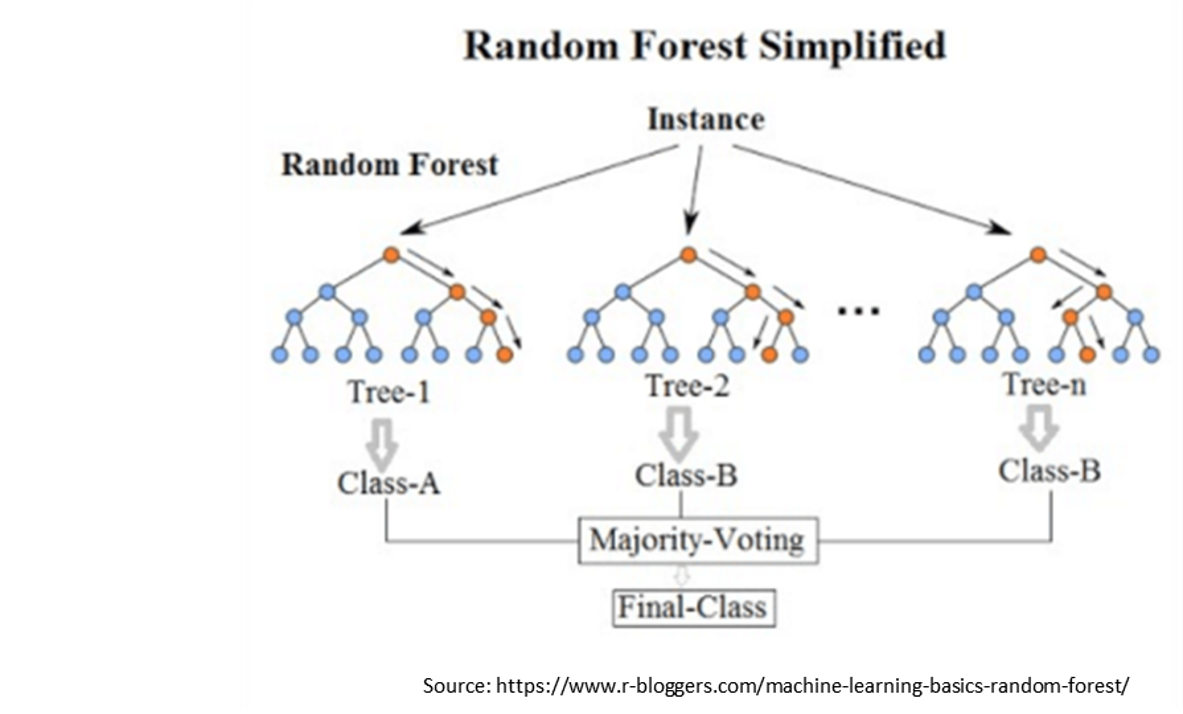

In [22]:
Image.open('images/RandomForest.png')

In [23]:
from sklearn.ensemble import RandomForestClassifier 

for x in range(2,10):
    for y in [100,50,10]:
        forest=RandomForestClassifier(max_depth=x,n_estimators=y)
        forest.fit(X_train,y_train)
        y_pred=forest.predict(X_test)
        print("depth= ",x,' estimators= ',y,' accuracy= ',accuracy_score(y_test,y_pred))

depth=  2  estimators=  100  accuracy=  0.9018264840182648
depth=  2  estimators=  50  accuracy=  0.9041095890410958
depth=  2  estimators=  10  accuracy=  0.9200913242009132
depth=  3  estimators=  100  accuracy=  0.9200913242009132
depth=  3  estimators=  50  accuracy=  0.9200913242009132
depth=  3  estimators=  10  accuracy=  0.9155251141552512
depth=  4  estimators=  100  accuracy=  0.9246575342465754
depth=  4  estimators=  50  accuracy=  0.9292237442922374
depth=  4  estimators=  10  accuracy=  0.9269406392694064
depth=  5  estimators=  100  accuracy=  0.9360730593607306
depth=  5  estimators=  50  accuracy=  0.9315068493150684
depth=  5  estimators=  10  accuracy=  0.9337899543378996
depth=  6  estimators=  100  accuracy=  0.9429223744292238
depth=  6  estimators=  50  accuracy=  0.9406392694063926
depth=  6  estimators=  10  accuracy=  0.9452054794520548
depth=  7  estimators=  100  accuracy=  0.9383561643835616
depth=  7  estimators=  50  accuracy=  0.9406392694063926
depth=  

In [24]:
from sklearn.ensemble import RandomForestClassifier 

forest_model=RandomForestClassifier(max_depth=8)
forest_model.fit(X_train,y_train)

y_pred=forest_model.predict(X_test)


## Ada Boost Classifier 
Boosting is a sequential ensemble where each model is built based on correcting the misclassifications of the previous model.
Boosting involves ‘weighted voting’, where each classifier votes to obtain a final outcome which is determined by the majority– but the sequential models were built by assigning greater weights to misclassified instances of the previous models.

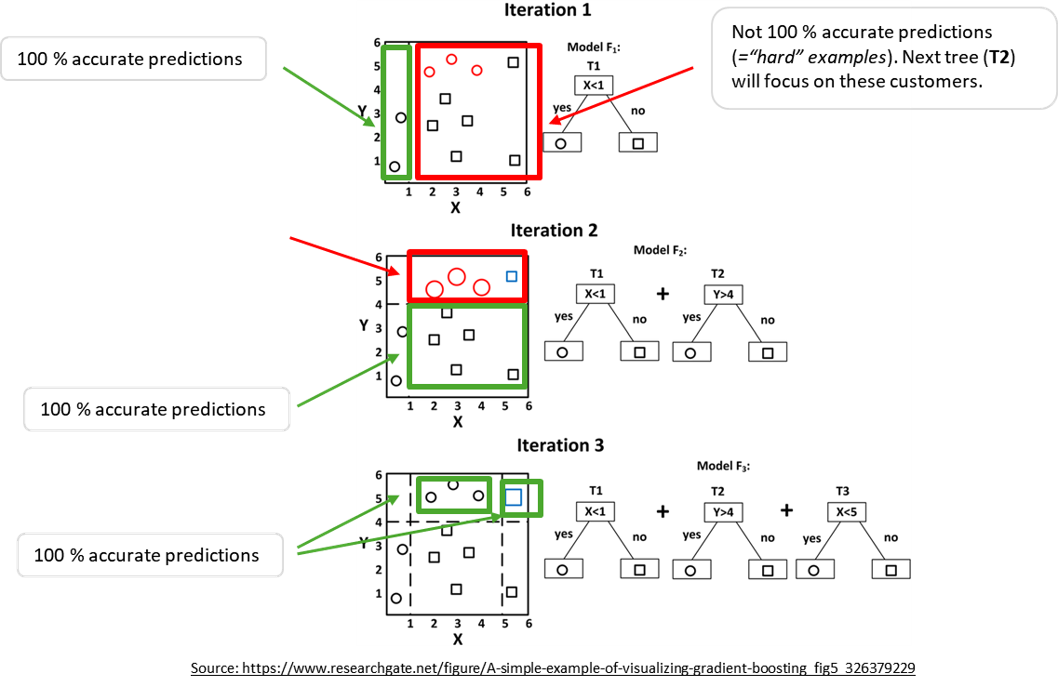

In [25]:
Image.open('images/GradientBoosting.png')

In [26]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
#from xgboost import XGBClassifier

ada_model = AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best'),
          learning_rate=0.75, n_estimators=300, random_state=None)
ada_model.fit(X_train,y_train)
y_pred=ada_model.predict(X_test)

## Support Vector Machine
VMs are one of the most robust prediction methods, being based on statistical learning framework. 
It is technique for supervised learning models with associated learning algorithms that analyze data for classification and regression analysis. 

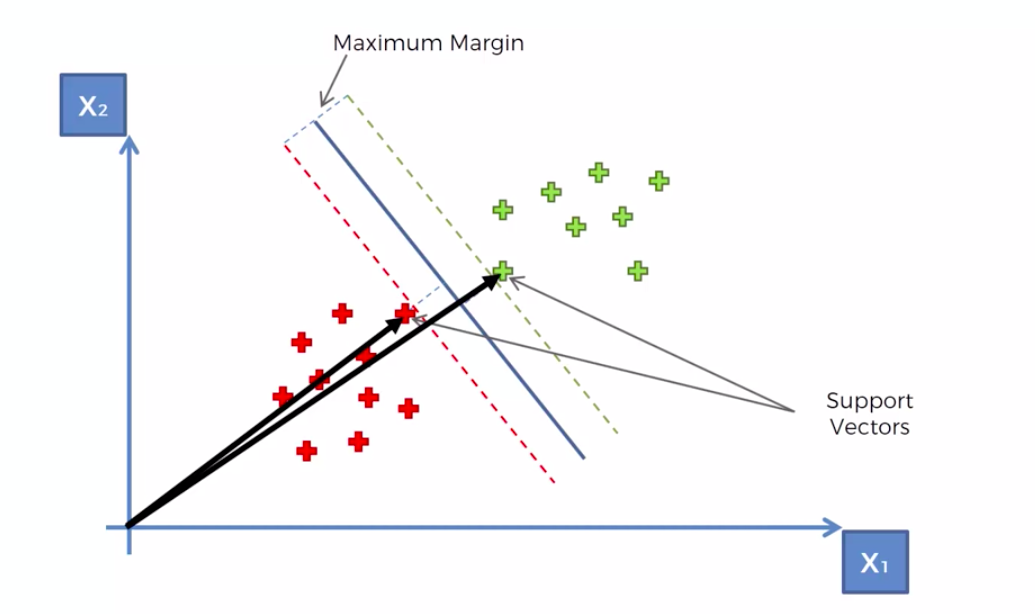

In [27]:
Image.open('images/SVM.png')

In [28]:
from sklearn.svm import SVC

svm_model = SVC(C=10.0)

svm_model.fit(X_train, y_train)
y_pred=svm_model.predict(X_test)

## Neural Network
Neural networks are made up of nodes that are arranged in layers. 

This construction varies depending on the type and complexity of the neural network. 


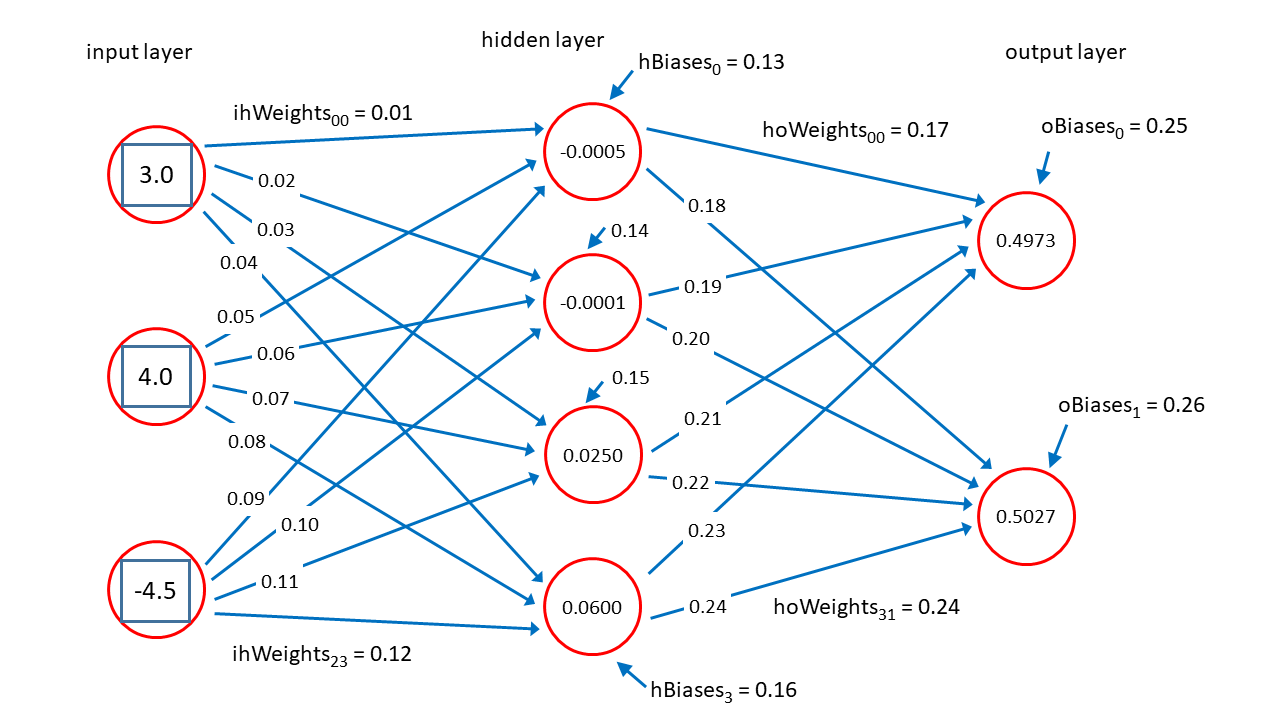

In [29]:
Image.open('images/NeuralN.png')

At the beginning, the weights or ''inputs" are assigned to each of the nodes in the first layer. During each iteration, the inputs are processed through the system and compared to the actual value. The error is measured and fed back through the system to adjust the weights. 

In most cases, the weights get better at predicting the actual values. The process ends when a predetermined minimum error level is reached.


One specific type of neural network commonly used in marketing uses sigmoidal functions to fit each node. Recall that this is the same function that is used in logistic regression. 
This technique is very powerful in fitting a binary or two -level outcome such as a response to an offer or a default on a loan.

One of the advantages of a neural network is its ability to pick up nonlinear relationships in the data. This can allow users to fit some types of data that would be difficult to fit using regression. 

One drawback, however, is its tendency to over-fit the data. This can cause the model to deteriorate more quickly when applied to new data. If this is the method of choice, be sure to validate carefully. 

Another disadvantage to consider is that the results of a neural network are often difficult to interpret.

In [30]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(64, 64))

nn_model.fit(X_train, y_train)
y_pred=nn_model.predict(X_test)

## Model Comparison - Results

In [31]:
log_acc = log_model.score(X_test, y_test)
tree_acc = tree_model.score(X_test, y_test)
tree_acc2 = tree_model2.score(X_test, y_test)
forest_acc = forest_model.score(X_test, y_test)
ada_acc = ada_model.score(X_test, y_test)
svm_acc = svm_model.score(X_test, y_test)
nn_acc = nn_model.score(X_test, y_test)

print("Accuracy Results\n" + "*"*40)
print("      Logistic Model:", log_acc)
print("       Decision Tree:", tree_acc)
print("      Decision Tree2:", tree_acc2)
print("        Forest Model:", forest_acc)
print("           Ada Boost:", ada_acc)
print("           SVM Model:", svm_acc)
print("Neural Network Model:", nn_acc)

Accuracy Results
****************************************
      Logistic Model: 0.9497716894977168
       Decision Tree: 0.9155251141552512
      Decision Tree2: 0.9406392694063926
        Forest Model: 0.9406392694063926
           Ada Boost: 0.9474885844748858
           SVM Model: 0.9474885844748858
Neural Network Model: 0.9429223744292238


### Exercises

1. Prepare target variable by label binarization from variable LotArea (large = 1, other = 0). As large are considered the top 30 %

In [32]:
# 1.
# Your solution

2. Build and fit logistic regression model. Don't forget to split data into train and test (70/30)

In [33]:
# 2.
# Your solution

3. Print classification report and accuracy score

In [34]:
# 3.
# Your solution